In [1]:
import pandas as pd
import seaborn as sns
import pickle
import matplotlib
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import glob

In [2]:
file_list = glob.glob('../repr_results/*agg_wmean_perm_num_5000.pkl')
file_list

['../repr_results/repr_res70_full_bonferroni_agg_wmean_perm_num_5000.pkl',
 '../repr_results/repr_res20_full_bonferroni_agg_wmean_perm_num_5000.pkl',
 '../repr_results/repr_res80_full_bonferroni_agg_wmean_perm_num_5000.pkl',
 '../repr_results/repr_res50_full_bonferroni_agg_wmean_perm_num_5000.pkl',
 '../repr_results/repr_res40_full_bonferroni_agg_wmean_perm_num_5000.pkl',
 '../repr_results/repr_res30_full_bonferroni_agg_wmean_perm_num_5000.pkl',
 '../repr_results/repr_res60_full_bonferroni_agg_wmean_perm_num_5000.pkl']

In [3]:
#for file_list[-3] in file_list:
#    with open(file, 'rb') as handle:
#        res_dict = pickle.load(handle)
#res_dict['fdr']['fdr_by']
file_list[0].split('_')[-4]

'wmean'

In [4]:
def create_dfs(file_list):
    prefix = file_list[0].split('_')[-4]
    df_list_power = []
    df_list_fdr = []
    df_list_count = []
    for file in file_list:
        with open(file, 'rb') as handle:
            res_dict = pickle.load(handle)
            df = pd.DataFrame(res_dict['power'])
            df['sample_size']=res_dict['sample_size']
            df_list_power.append(df)
            df = pd.DataFrame(res_dict['fdr'])
            df['sample_size']=res_dict['sample_size']
            df_list_fdr.append(df)
            df = pd.DataFrame(res_dict['count'])
            df['sample_size']=res_dict['sample_size']
            df_list_count.append(df)
    power_df = pd.concat(df_list_power)
    fdr_df = pd.concat(df_list_fdr)
    count_df  = pd.concat(df_list_count)
    for df in [power_df, fdr_df, count_df]:
        df.rename(columns={'np': f'np_{prefix}'}, inplace=True)
    return power_df, fdr_df, count_df


In [5]:
df_list_power = []
df_list_fdr = []
df_list_count = []
for prefix in ['max', 'wmean']:
    file_list = glob.glob(f'../repr_results/*agg_{prefix}_perm_num_5000.pkl')
    power_df, fdr_df, count_df = create_dfs(file_list)
    df_list_power.append(power_df)
    df_list_fdr.append(fdr_df)
    df_list_count.append(count_df)
power_df = pd.concat(df_list_power)
fdr_df = pd.concat(df_list_fdr)
count_df  = pd.concat(df_list_count)

In [13]:
melted_df.corr_method.unique()
melted_df[melted_df.corr_method.isin(['bonferroni', 'sidak', 'holm', 'fdr_bh', 'fdr_by', 'np_max', 'np_wmean'])]

,sample_size,corr_method,power
14000,70,bonferroni,0.143162
14001,70,bonferroni,0.256410
14002,70,bonferroni,0.254274
14003,70,bonferroni,0.198718
14004,70,bonferroni,0.188034
...,...,...,...
125995,60,np_wmean,0.472222
125996,60,np_wmean,0.369658
125997,60,np_wmean,0.369658
125998,60,np_wmean,0.474359


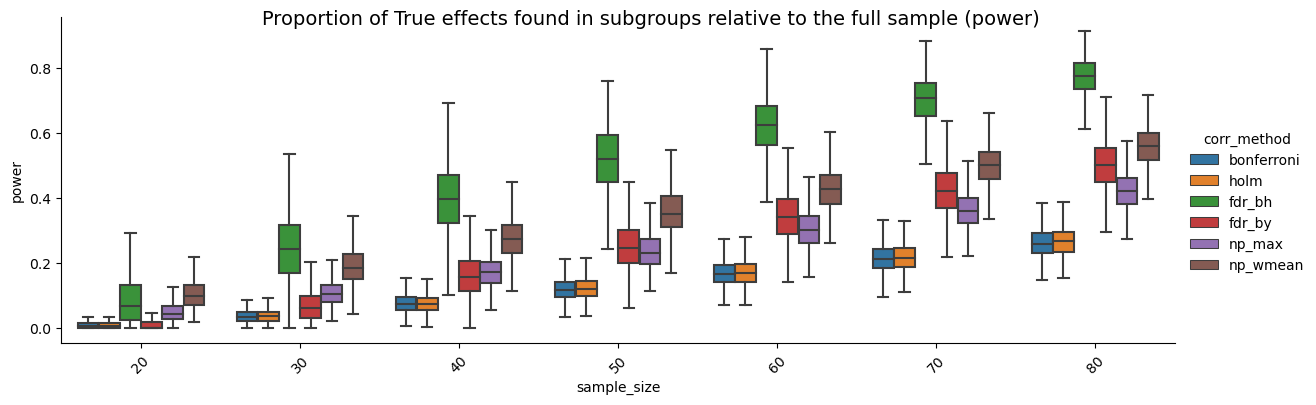

In [107]:
melted_df = power_df.melt(var_name='corr_method', value_name='power', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'power', hue = 'corr_method',
                data= melted_df[melted_df.corr_method.isin(['bonferroni', 'holm', 'fdr_bh', 'fdr_by', 'np_max', 'np_wmean'])],
                kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Proportion of True effects found in subgroups relative to the full sample (power)', fontsize=14);

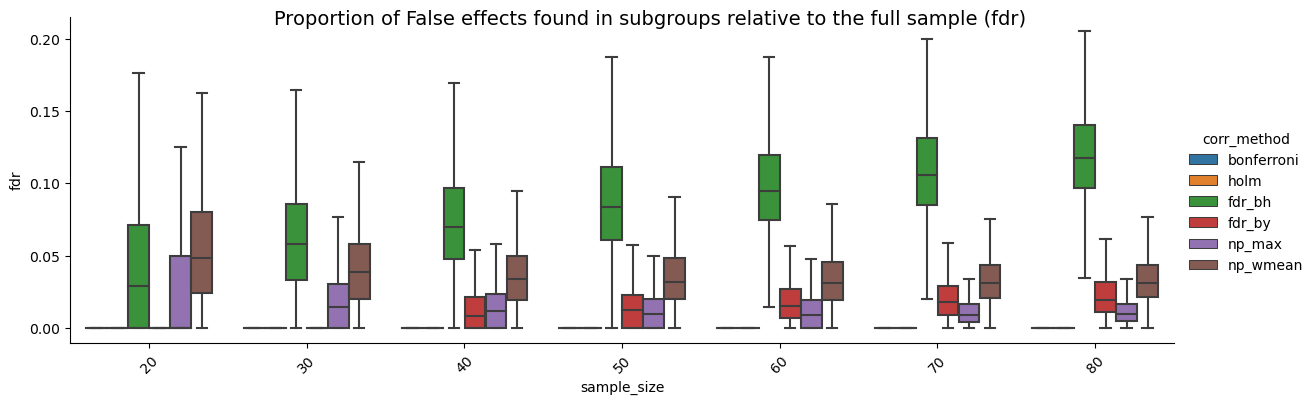

In [109]:
melted_df = fdr_df.melt(var_name='corr_method', value_name='fdr', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'fdr', hue = 'corr_method',
                data= melted_df[melted_df.corr_method.isin(['bonferroni', 'holm', 'fdr_bh', 'fdr_by', 'np_max', 'np_wmean'])], 
                kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Proportion of False effects found in subgroups relative to the full sample (fdr)', fontsize=14);


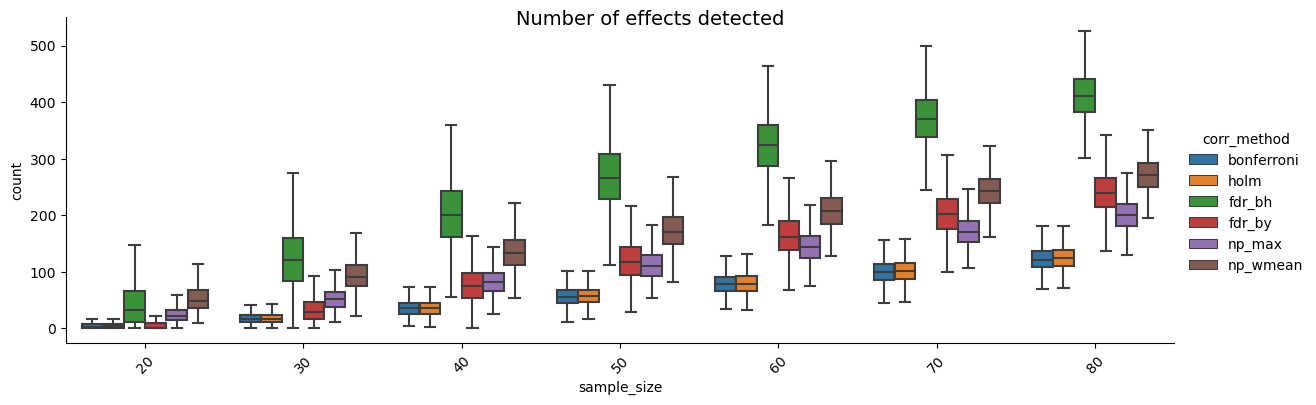

In [111]:
melted_df = count_df.melt(var_name='corr_method', value_name='count', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'count', hue = 'corr_method', 
                data= melted_df[melted_df.corr_method.isin(['bonferroni', 'holm', 'fdr_bh', 'fdr_by', 'np_max', 'np_wmean'])], 
                kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Number of effects detected', fontsize=14);

In [118]:
file_list = glob.glob('../repr_results/*_num_smpls_500_eff_bs_num_1000.csv')
file_list

['../repr_results/stats_full_with_sbs_np_wmean_10000_num_smpls_500_eff_bs_num_1000.csv',
 '../repr_results/stats_full_with_sbs_np_max_10000_num_smpls_500_eff_bs_num_1000.csv',
 '../repr_results/stats_full_with_sbs_fdr_by_num_smpls_500_eff_bs_num_1000.csv',
 '../repr_results/stats_full_with_sbs_bonferroni_num_smpls_500_eff_bs_num_1000.csv',
 '../repr_results/stats_full_with_sbs_holm_num_smpls_500_eff_bs_num_1000.csv',
 '../repr_results/stats_full_with_sbs_fdr_bh_num_smpls_500_eff_bs_num_1000.csv']

In [135]:
df_freq_list = []
for file in file_list:
    method = file.split('sbs_')[1].split('_num_smpls')[0]
    if method == 'np_wmean_10000':
        method = 'np_wmean'
    if method == 'np_max_10000':
        method = 'np_max'
    df_freq = pd.read_csv(file, index_col=0)
    df_freq = df_freq[df_freq.abs_eff_size>0.8].filter(regex='freq_repr')
    cols = [col.split('repr_')[1] for col in df_freq.columns]
    df_freq.columns = cols
    df_freq['method'] = method
    df_freq_list.append(df_freq)
freq_df = pd.concat(df_freq_list)

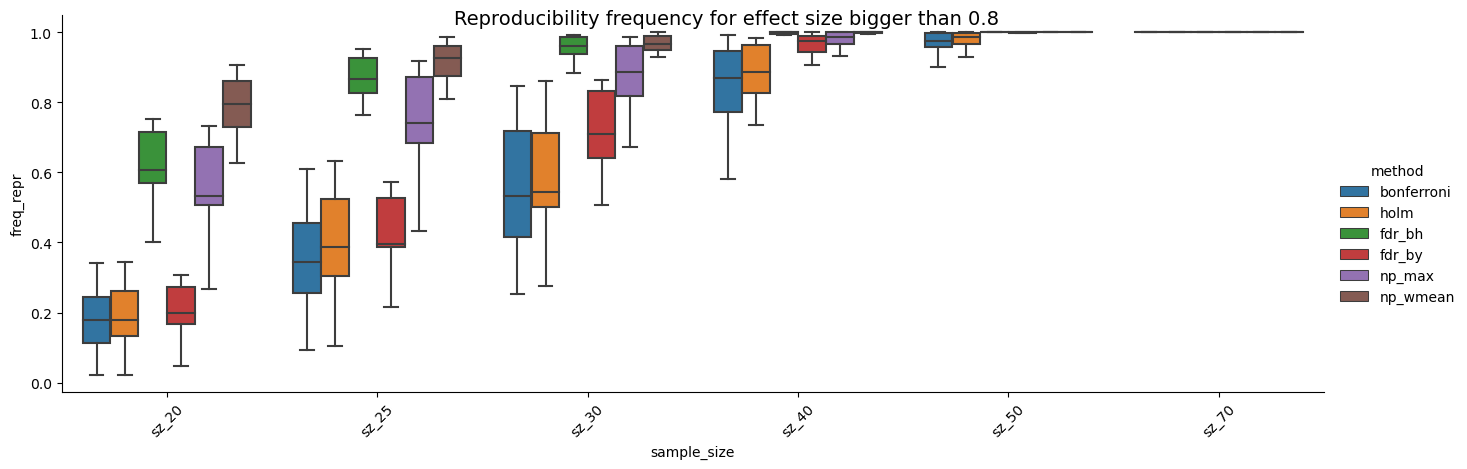

In [136]:
melted_freq = freq_df.melt(var_name='sample_size', value_name='freq_repr', id_vars = ['method'])
g = sns.catplot(x = 'sample_size',y = 'freq_repr', hue = 'method',
                data=melted_freq, 
                hue_order = ['bonferroni', 'holm', 'fdr_bh', 'fdr_by', 'np_max', 'np_wmean'],
                kind = 'box', 
                height=4.5, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Reproducibility frequency for effect size bigger than 0.8', fontsize=14);


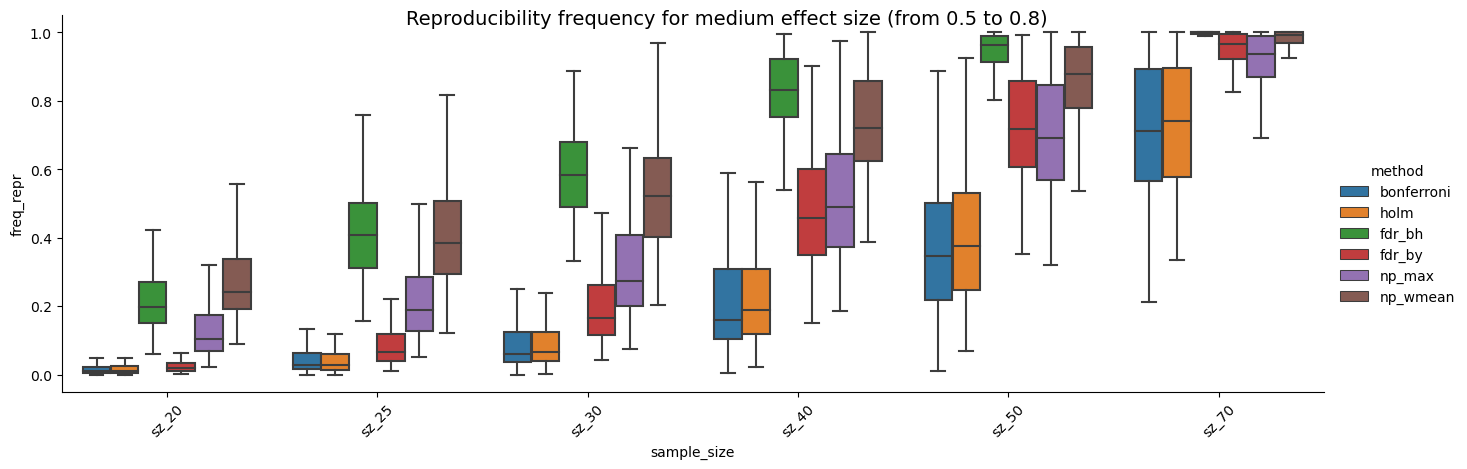

In [137]:
df_freq_list = []
for file in file_list:
    method = file.split('sbs_')[1].split('_num_smpls')[0]
    if method == 'np_wmean_10000':
        method = 'np_wmean'
    if method == 'np_max_10000':
        method = 'np_max'
    df_freq = pd.read_csv(file, index_col=0)
    df_freq = df_freq[(df_freq.abs_eff_size<0.8) & (df_freq.abs_eff_size>0.5)].filter(regex='freq_repr')
    cols = [col.split('repr_')[1] for col in df_freq.columns]
    df_freq.columns = cols
    df_freq['method'] = method
    df_freq_list.append(df_freq)
freq_df = pd.concat(df_freq_list)
melted_freq = freq_df.melt(var_name='sample_size', value_name='freq_repr', id_vars = ['method'])
g = sns.catplot(x = 'sample_size',y = 'freq_repr', hue = 'method',
                data=melted_freq, 
                hue_order = ['bonferroni', 'holm', 'fdr_bh', 'fdr_by', 'np_max', 'np_wmean'],
                kind = 'box', 
                height=4.5, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Reproducibility frequency for medium effect size (from 0.5 to 0.8)', fontsize=14);

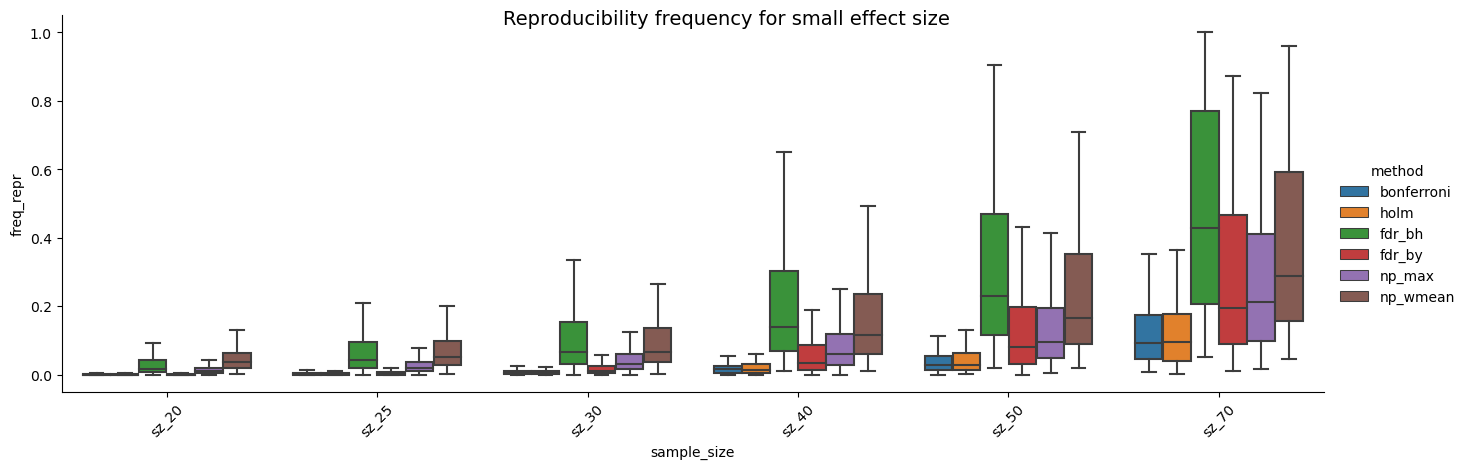

In [139]:
df_freq_list = []
for file in file_list:
    method = file.split('sbs_')[1].split('_num_smpls')[0]
    if method == 'np_wmean_10000':
        method = 'np_wmean'
    if method == 'np_max_10000':
        method = 'np_max'
    df_freq = pd.read_csv(file, index_col=0)
    df_freq = df_freq[(df_freq.abs_eff_size<0.5)].filter(regex='freq_repr')
    cols = [col.split('repr_')[1] for col in df_freq.columns]
    df_freq.columns = cols
    df_freq['method'] = method
    df_freq_list.append(df_freq)
freq_df = pd.concat(df_freq_list)
melted_freq = freq_df.melt(var_name='sample_size', value_name='freq_repr', id_vars = ['method'])
g = sns.catplot(x = 'sample_size',y = 'freq_repr', hue = 'method',
                data=melted_freq,
                hue_order = ['bonferroni', 'holm', 'fdr_bh', 'fdr_by', 'np_max', 'np_wmean'],
                kind = 'box', 
                height=4.5, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Reproducibility frequency for small effect size', fontsize=14);

In [113]:
file_list = glob.glob('../repr_results/*in_group.pkl')
file_list

['../repr_results/dice_25_in_group.pkl',
 '../repr_results/dice_30_in_group.pkl',
 '../repr_results/dice_40_in_group.pkl',
 '../repr_results/dice_50_in_group.pkl',
 '../repr_results/dice_20_in_group.pkl',
 '../repr_results/dice_60_in_group.pkl']

In [114]:
df_list = []
for file in file_list:
    with open(file, 'rb') as handle:
        res_dict = pickle.load(handle)
        sample_size = int(file.split('dice_')[1].split('_')[0])
        df = pd.DataFrame(res_dict)
        df['sample_size']=sample_size
        df_list.append(df)
df = pd.concat(df_list)
df.rename(columns={'np': 'np_max'}, inplace=True)
df

,uncorr,bonferroni,sidak,holm,fdr_bh,fdr_by,np_max,np_wmean,sample_size
0,0.439216,0.571429,0.000000,0.322581,0.210526,0.275862,0.202247,0.325301,25
1,0.372263,0.142857,0.454545,0.250000,0.425856,0.178571,0.397163,0.397790,25
2,0.370370,0.000000,0.210526,0.105263,0.294872,0.108108,0.219780,0.364583,25
3,0.323077,0.000000,0.000000,0.166667,0.251908,0.378378,0.197802,0.412060,25
4,0.308390,0.307692,0.000000,0.489796,0.291892,0.000000,0.415094,0.468900,25
...,...,...,...,...,...,...,...,...,...
25,0.606717,0.532374,0.554913,0.461538,0.603774,0.580460,0.565789,0.538283,60
26,0.653148,0.666667,0.492958,0.435233,0.723514,0.574850,0.576577,0.624413,60
27,0.671946,0.532544,0.539877,0.568306,0.616613,0.622328,0.516364,0.644737,60
28,0.642082,0.552632,0.538012,0.534247,0.568720,0.426573,0.591760,0.561404,60


In [115]:
df[df.sample_size==20]

,uncorr,bonferroni,sidak,holm,fdr_bh,fdr_by,np_max,np_wmean,sample_size
0,0.428835,0.000000,0.000000,0.000000,0.431373,NaN,0.274510,0.206897,20
1,0.331707,0.074074,0.200000,0.000000,0.289256,NaN,0.000000,0.255814,20
2,0.409736,0.000000,0.000000,0.000000,0.054054,NaN,0.181818,0.215054,20
3,0.415525,0.000000,0.000000,0.000000,0.000000,0.000000,0.188679,0.285714,20
4,0.361217,0.000000,0.000000,0.000000,0.085470,NaN,0.050000,0.183333,20
...,...,...,...,...,...,...,...,...,...
355,0.353398,0.000000,0.000000,0.000000,0.275862,0.000000,0.171429,0.200000,20
356,0.381853,0.000000,0.250000,0.000000,0.600000,0.000000,0.083333,0.276923,20
357,0.301370,0.000000,0.363636,0.400000,0.216867,0.000000,0.179487,0.219780,20
358,0.401055,0.000000,0.000000,0.000000,0.093750,0.090909,0.179104,0.232558,20


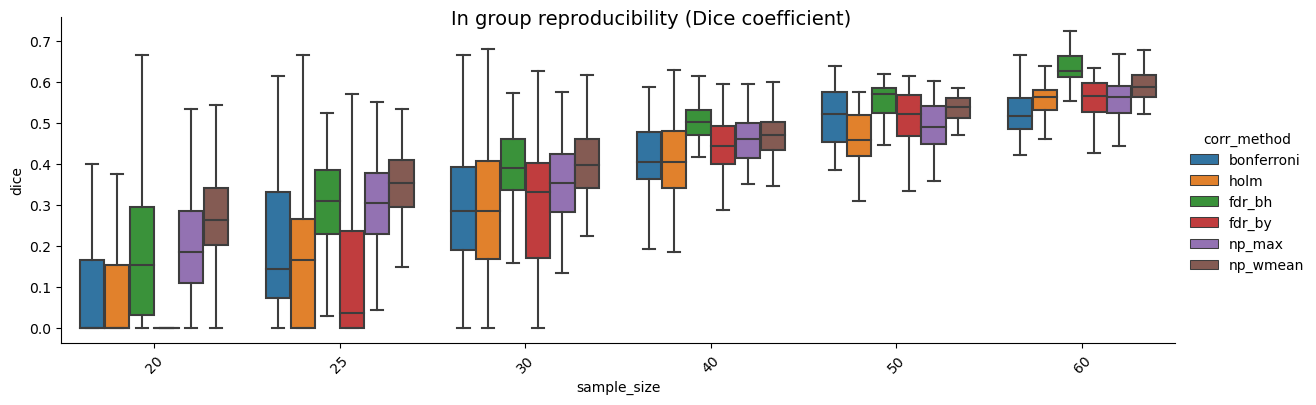

In [116]:
melted_df = df.melt(var_name='corr_method', value_name='dice', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'dice', hue = 'corr_method',
                data= melted_df[melted_df.corr_method.isin(['bonferroni', 'holm', 'fdr_bh', 'fdr_by', 'np_max', 'np_wmean'])],
                kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('In group reproducibility (Dice coefficient)', fontsize=14);

In [117]:
pd.DataFrame(res_dict)

,uncorr,bonferroni,sidak,holm,fdr_bh,fdr_by,np,np_wmean
0,0.582893,0.580153,0.489209,0.531915,0.663664,0.488235,0.500000,0.584906
1,0.599784,0.439716,0.468085,0.523256,0.700000,0.527094,0.522876,0.618257
2,0.721670,0.560976,0.678571,0.571429,0.698462,0.507576,0.612245,0.587912
3,0.663647,0.518987,0.500000,0.562874,0.611268,0.557576,0.557252,0.574713
4,0.674672,0.600000,0.500000,0.567742,0.623794,0.587209,0.572438,0.565854
5,0.723127,0.590000,0.670330,0.602273,0.629630,0.634731,0.668896,0.620347
6,0.662407,0.468966,0.610390,0.564103,0.633997,0.600000,0.517134,0.582011
7,0.621739,0.484848,0.605714,0.589595,0.616246,0.557185,0.445183,0.639269
8,0.645006,0.561404,0.601093,0.561983,0.721358,0.539326,0.604790,0.610811
9,0.602656,0.503597,0.567901,0.597015,0.620178,0.589812,0.623529,0.560794


In [ ]:
 df = pd.DataFrame(res_dict['power'])
            df['sample_size']=res_dict['sample_size']

In [82]:
from plotting_tables import DrawEEG1020, DrawDfEEG

ModuleNotFoundError: No module named 'plotting_tables'

In [ ]:
obj = DrawDfEEG(self.df)
        filter_by = self.df['abs_eff_size'].values > 0.5
        band_list = ['delta', 'theta', 'alpha1', 'alpha2', 'beta1', 'beta2', 'gamma']
        obj.draw_edges(band_col='band',
                       band=band_list,
                       chan_col='chan_pair',
                       filter_by=filter_by,
                       color_col='mean_eff_size',
                       width_col='abs_eff_size',
                       sign='same')

In [ ]:
freq_df = pd.concat(df_freq_list)
melted_freq = freq_df.melt(var_name='sample_size', value_name='freq_repr', id_vars = ['method'])
g = sns.catplot(x = 'sample_size',y = 'freq_repr', hue = 'method',
                data=melted_freq, 
                kind = 'box', 
                height=4.5, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Reproducibility frequency for medium effect size (from 0.5 to 0.8)', fontsize=14);

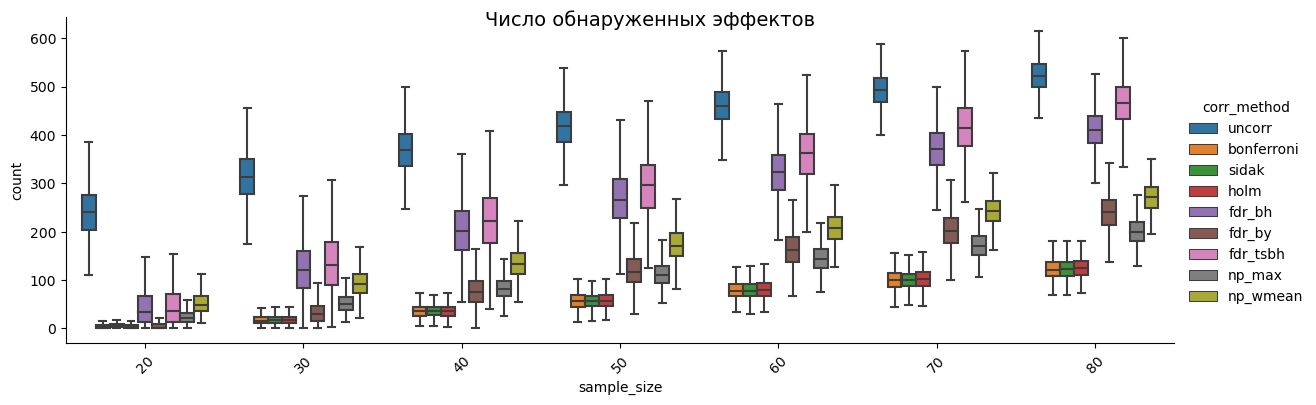

In [50]:
melted_df = count_df.melt(var_name='corr_method', value_name='count', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'count', hue = 'corr_method', data= melted_df, kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Число обнаруженных эффектов', fontsize=14);

In [19]:
file_list = glob.glob('../repr_results/*agg_max_perm_num_5000.pkl')
file_list

['../repr_results/repr_res70_full_bonferroni_agg_max_perm_num_5000.pkl',
 '../repr_results/repr_res50_full_bonferroni_agg_max_perm_num_5000.pkl',
 '../repr_results/repr_res60_full_bonferroni_agg_max_perm_num_5000.pkl',
 '../repr_results/repr_res40_full_bonferroni_agg_max_perm_num_5000.pkl',
 '../repr_results/repr_res20_full_bonferroni_agg_max_perm_num_5000.pkl',
 '../repr_results/repr_res80_full_bonferroni_agg_max_perm_num_5000.pkl',
 '../repr_results/repr_res30_full_bonferroni_agg_max_perm_num_5000.pkl']

In [20]:
power_df, fdr_df, count_df = create_dfs(file_list)

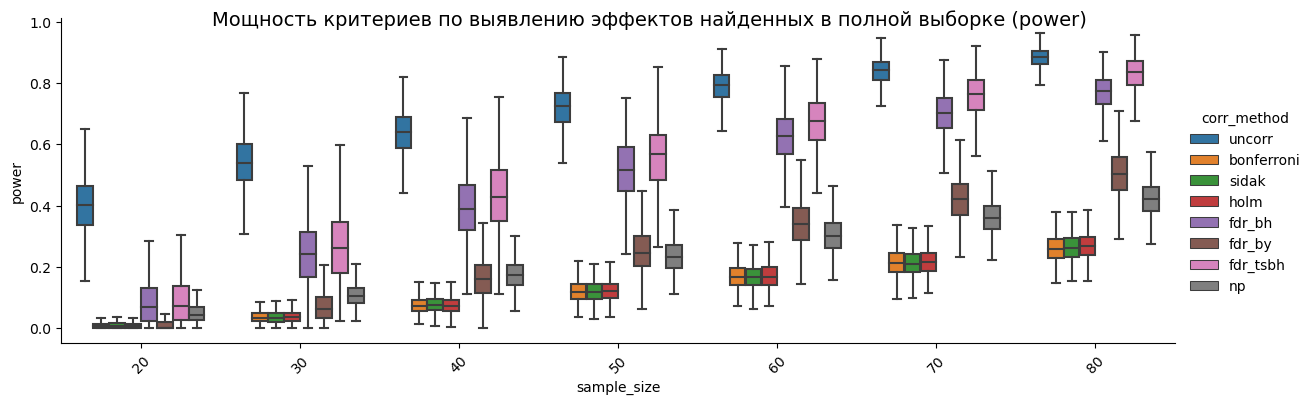

In [21]:
melted_df = power_df.melt(var_name='corr_method', value_name='power', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'power', hue = 'corr_method', data= melted_df, kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Мощность критериев по выявлению эффектов найденных в полной выборке (power)', fontsize=14);

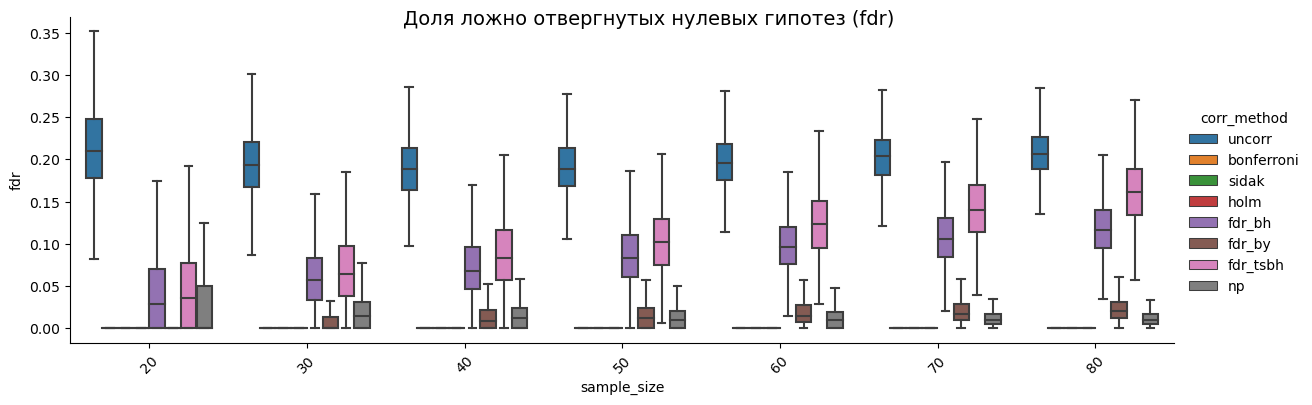

In [22]:
melted_df = fdr_df.melt(var_name='corr_method', value_name='fdr', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'fdr', hue = 'corr_method', data= melted_df, kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Доля ложно отвергнутых нулевых гипотез (fdr)', fontsize=14);


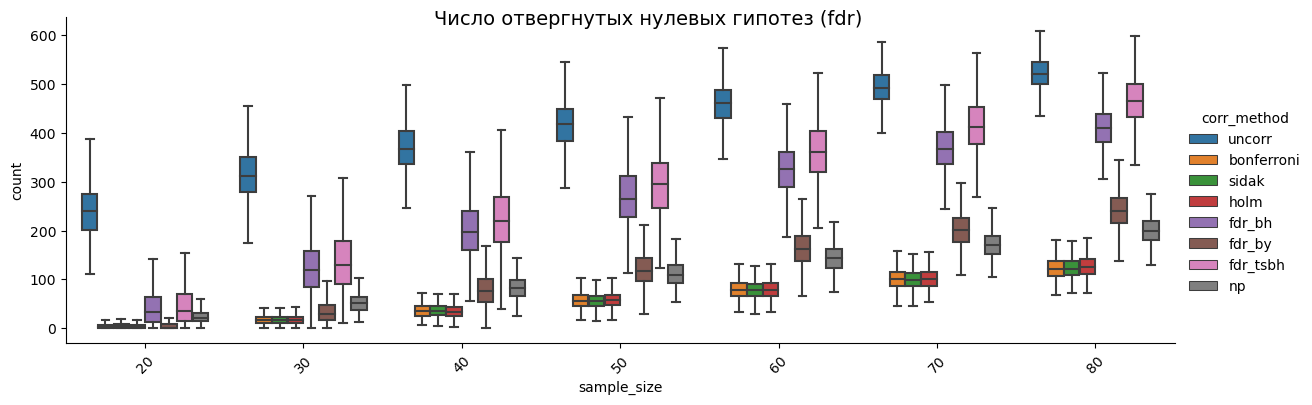

In [23]:
melted_df = count_df.melt(var_name='corr_method', value_name='count', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'count', hue = 'corr_method', data= melted_df, kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Число отвергнутых нулевых гипотез (fdr)', fontsize=14);

## Частота воспроизводимости и p-values

In [110]:
file_list = glob.glob('../repr_results/*wmean_5000.pkl')
file_list

['../repr_results/bs_samples_p_70_bs_num_500_np_wmean_5000.pkl',
 '../repr_results/bs_samples_p_80_bs_num_500_np_wmean_5000.pkl',
 '../repr_results/bs_samples_p_60_bs_num_500_np_wmean_5000.pkl',
 '../repr_results/bs_samples_p_20_bs_num_500_np_wmean_5000.pkl',
 '../repr_results/bs_samples_p_50_bs_num_500_np_wmean_5000.pkl',
 '../repr_results/bs_samples_p_30_bs_num_500_np_wmean_5000.pkl',
 '../repr_results/bs_samples_p_40_bs_num_500_np_wmean_5000.pkl']

In [113]:
file

'../repr_results/bs_samples_p_20_bs_num_500_np_wmean_5000.pkl'

In [127]:
file=file_list[1]


In [140]:
(res_dict['p_vals_arr']<=0.05).mean(axis=0).flatten()

array([0.018, 0.056, 0.378, ..., 0.002, 0.   , 0.   ])

In [143]:
res_dict['sample_size']

80

(0.0, 0.05)

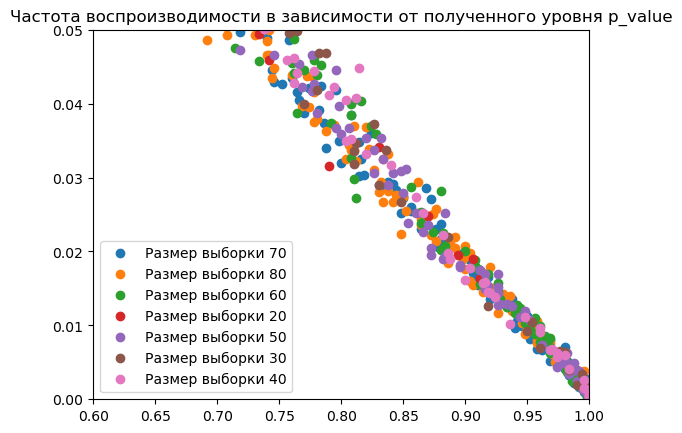

In [148]:
for file in file_list:
    with open(file, 'rb') as handle:
        res_dict = pickle.load(handle)
    sz = res_dict['sample_size']
    plt.plot((res_dict['p_vals_arr']<=0.05).mean(axis=0).flatten(), 
    res_dict['p_vals_arr'].mean(axis=0).flatten(), 'o', label = f'Размер выборки {sz}');
plt.legend()
plt.title('Частота воспроизводимости в зависимости от полученного уровня p_value')
plt.xlim((0.6, 1))
plt.ylim((0, 0.05))

In [106]:
freq.shape, res_dict['p_vals_arr'].shape

((171,), (500, 171, 7))

In [101]:
res_dict['p_vals_arr'].swapaxes(0,1).shape

(171, 500, 7)

In [104]:
(res_dict['p_vals_arr']<=0.05).mean(axis=0).shape

(171, 7)

ValueError: x has 7 columns but y has 500 columns

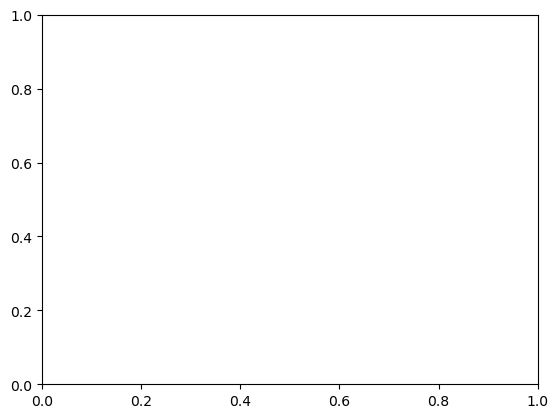

In [103]:
plt.plot((res_dict['p_vals_arr']<=0.05).mean(axis=0), 
res_dict['p_vals_arr'].swapaxes(0,1)[:,:,0], 'bo')

In [ ]:
(res_dict['p_vals_arr']<=0.05).mean(axis=0)/

In [105]:
(res_dict['p_vals_arr']<=0.05).mean(axis=0).shape

(171, 7)

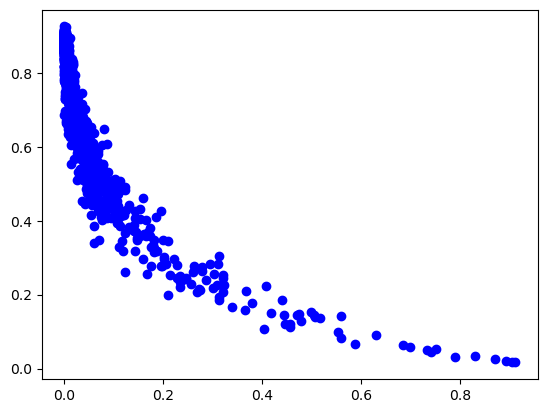

In [99]:
plt.plot((res_dict['p_vals_arr']<=0.05).mean(axis=0), 
res_dict['p_vals_arr'].mean(axis=0), 'bo')
